# Naive Bayes

### Credits : https://towardsdatascience.com/implementing-a-naive-bayes-classifier-f206805a95fd

## Importing the libraries

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, plot_roc_curve

import matplotlib.pyplot as plt

## Importing the dataset and Splitting the dataset into the Training set and Test set

In [4]:
data_train = fetch_20newsgroups(subset='train', categories=None,
                                shuffle=True, random_state=42,
                                remove=('headers', 'footers', 'quotes'))

data_test = fetch_20newsgroups(subset='test', categories=None,
                               shuffle=True, random_state=42,
                               remove=('headers', 'footers', 'quotes'))
X_train = data_train.data
y_train = data_train.target
X_test = data_test.data
y_test = data_test.target

In [5]:
type(data_train)

sklearn.utils.Bunch

In [6]:
data_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [7]:
data_train['data'][0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [8]:
data_train['target'][0]

7

In [9]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

## Feature Scaling

In [18]:
vectorizer = CountVectorizer(max_features=2000)
# vectorizer = CountVectorizer()
X_train2 = vectorizer.fit_transform(X_train)
X_test2 = vectorizer.transform(X_test)
len(vectorizer.vocabulary_)

2000

## Training the Naive Bayes model on the Training set

In [11]:
classifier = GaussianNB()
classifier.fit(X_train2.toarray(), y_train)

GaussianNB()

## Predicting the Test set results

In [12]:
y_pred = classifier.predict(X_test2.toarray())

## Making the Confusion Matrix

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 91   0   2   1  10   0   6   8  15  67   0   4   1   3   3  46   3   7
    5  47]
 [  0  94  16  38  79  17  25   4  13  48   2   8  14  11  16   2   1   0
    0   1]
 [  1  27  30  59 154  25  19   3   9  35   0   5   7   9   7   1   0   0
    1   2]
 [  0   9   8 112 165   2  25   6   6  26   1   7  19   1   4   0   1   0
    0   0]
 [  1   9   5  34 219   2  27   1  10  45   1   3  16   6   5   0   0   0
    0   1]
 [  2  74  29  26  71 118  16   2  11  27   0   4   8   5   1   0   0   1
    0   0]
 [  0   3   1  10  68   5 202  10  18  43   3   6  11   4   3   0   1   2
    0   0]
 [  1   1   0   6  23   0  16 122  97  80   0   4  19   2   5   1  12   0
    5   2]
 [  1   0   0   0  18   1  10  39 187 106   2   2   5   5   5   2   8   1
    1   5]
 [  7   0   0   3   4   1   8   9  13 248  41   5   4   6   3   4   7   1
   20  13]
 [  1   0   0   0   2   0  10   4  17 178 163   1   1   3   1   2   5   1
    4   6]
 [ 12   6   9   6  18   1   6  18  19  58   2 189   9   1  17   7

## Visualising the results

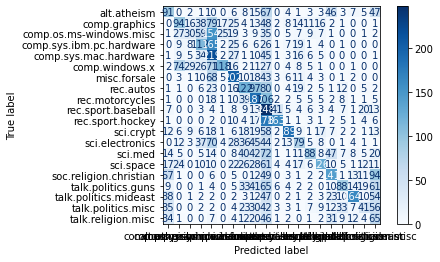

In [14]:
plot_confusion_matrix(classifier, X_test2.toarray(), y_test, display_labels=['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'], cmap=plt.cm.Blues) 

In [15]:
# Performance Metrics
accuracy  = round(100*accuracy_score(y_test,y_pred),2)
precision = round(100*precision_score(y_test,y_pred,average='macro'),2)
recall    = round(100*recall_score(y_test,y_pred,average='macro'),2) 
f1        = round(f1_score(y_test,y_pred,average='macro'),2)


In [16]:
print("Accuracy: {0}".format(accuracy))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))
print("F1: {0}".format(f1))

Accuracy: 34.08
Precision: 40.96
Recall: 33.65
F1: 0.34
